In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bag_reader.bag_reader import BagReader
from bag_processor.bag_processor import DepthHandler

dp = DepthHandler()

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
bag_read = BagReader('/home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-11-06-19-06-55.bag')
bag_read.get_data()
feat_df = dp.get_depth_features_df(bag_read.depth_df)

[INFO]  Data folder /home/nimibot/catkin_ws/src/ros_env_prediction/env_recorder_pkg/bag/2022-11-06-19-06-55 already exists. Not creating.
[INFO]  Bag already exported, Reading data ...


In [3]:
feat_df["mean"]

0      [[1.4126831, 1.4142869, 1.3839594, 1.3766515],...
1      [[1.1514629, 1.139083, 1.1198798, 1.1273831], ...
2      [[1.4442388, 1.4556627, 1.402625, 1.430891], [...
3      [[1.4057184, 1.419516, 1.3252776, 1.3438162], ...
4      [[1.3541908, 1.3063757, 1.3273325, 1.3169888],...
                             ...                        
142    [[1.2693664, 1.2663032, 1.2680237, 1.2630937],...
143    [[1.5898595, 1.6158509, 1.6229221, 1.6370058],...
144    [[1.3705517, 1.365219, 1.3571962, 1.3460208], ...
145    [[1.5379176, 1.514827, 1.5099074, 1.5002123], ...
146    [[1.5841279, 1.5741413, 1.5838647, 1.6382481],...
Name: mean, Length: 147, dtype: object

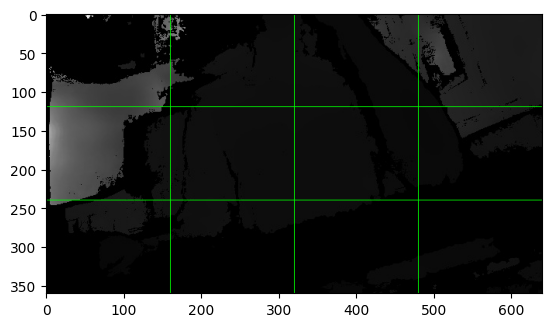

In [7]:
dp.imshow_with_grid(feat_df["frame_path"][50])

12